In [1]:
import sqlite3

import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import math
import time

#!pip install deepface
from deepface import DeepFace
from deepface.commons import package_utils, folder_utils

In [2]:
model = DeepFace.build_model("Facenet")

In [3]:
facial_img_paths = []
#Available at: https://github.com/serengil/deepface/tree/master/tests/dataset
for root, directory, files in os.walk("../dataset"):
    for file in files:
        if '.jpg' in file:
            facial_img_paths.append(root+"/"+file)

In [4]:
len(facial_img_paths)

62

In [17]:
instances = []
 
for i in tqdm(range(0, len(facial_img_paths))):
#for i in tqdm(range(0, 10)):
    facial_img_path = facial_img_paths[i]   
    embedding = DeepFace.represent(img_path = facial_img_path, model_name = "Facenet", enforce_detection=False)[0]["embedding"]
    objs = DeepFace.analyze(img_path = facial_img_path
) 
    instance = []
    instance.append(facial_img_path)
    instance.append(embedding)
    instance.append(objs[0]["dominant_emotion"])
    instance.append(objs[0]["age"])
    instance.append(objs[0]["dominant_gender"])
    instance.append(objs[0]["dominant_race"])
    instances.append(instance)

100%|██████████| 62/62 [04:30<00:00,  4.37s/it]


In [18]:
instances[0][2]

'fear'

In [25]:
df = pd.DataFrame(instances, columns = ["img_name", "embedding","dominant_emotion", "age", "dominant_gender", "dominant_race"])
df.head()

,img_name,embedding,dominant_emotion,age,dominant_gender,dominant_race
0,../dataset/couple.jpg,"[-0.9569708108901978, 0.10792163014411926, -1....",fear,31,Man,latino hispanic
1,../dataset/img1.jpg,"[0.8597482442855835, 0.9605178833007812, 1.345...",happy,31,Woman,latino hispanic
2,../dataset/img10.jpg,"[-0.3334352374076843, 1.2074142694473267, 1.05...",neutral,32,Woman,white
3,../dataset/img11.jpg,"[0.4563964009284973, 0.19060522317886353, 1.72...",fear,32,Woman,white
4,../dataset/img11_reflection.jpg,"[0.7846647500991821, 0.7575387954711914, 1.717...",neutral,36,Woman,white


In [21]:
conn = sqlite3.connect('facialdb.db')

In [22]:
cursor = conn.cursor()

In [36]:
cursor.execute('''drop table if exists face_meta ''')
cursor.execute('''drop table if exists face_embeddings''')

cursor.execute('''create table face_meta (ID INT primary key, IMG_NAME VARCHAR(10), EMBEDDING BLOB)''')
cursor.execute('''create table face_embeddings (FACE_ID INT, DIMENSION INT, VALUE DECIMAL(5, 30))''')

In [ ]:
import json
import pickle

for index, instance in tqdm(df.iterrows(), total=df.shape[0]):
    img_name = instance["img_name"]
    embeddings = instance["embedding"]
     
    # Convert embeddings to JSON string
    embeddings_json = json.dumps(embeddings)
    
    # Insert into face_meta table
    insert_statement = "INSERT INTO face_meta (ID, IMG_NAME, EMBEDDING) VALUES (?, ?, ?)"
    insert_args = (index, img_name, embeddings_json)
    cursor.execute(insert_statement, insert_args)
    
    # Insert into face_embeddings table
    for i, embedding in enumerate(embeddings):
        insert_statement = "INSERT INTO face_embeddings (FACE_ID, DIMENSION, VALUE) VALUES (?, ?, ?)"
        insert_args = (index, i, embedding)
        cursor.execute(insert_statement, insert_args)

100%|██████████| 62/62 [00:00<00:00, 673.93it/s]


In [42]:
cursor.execute('''DROP TABLE IF EXISTS face_meta''')
cursor.execute('''DROP TABLE IF EXISTS face_embeddings''')

cursor.execute('''CREATE TABLE face_meta (
                    ID INT PRIMARY KEY,
                    IMG_NAME VARCHAR(10),
                    EMBEDDING BLOB,
                    AGE INT,
                    DOMINANT_EMOTION VARCHAR(32),
                    DOMINANT_GENDER VARCHAR(32),
                    DOMINANT_RACE VARCHAR(32)
                )''')
cursor.execute('''CREATE TABLE face_embeddings (
                    FACE_ID INT,
                    DIMENSION INT,
                    VALUE DECIMAL(5, 30)
                )''')


In [43]:
import json
import pickle

for index, instance in tqdm(df.iterrows(), total=df.shape[0]):
    img_name = instance["img_name"]
    embeddings = instance["embedding"]
    age = instance["age"]
    dominant_emotion = instance["dominant_emotion"]
    dominant_gender = instance["dominant_gender"]
    dominant_race = instance["dominant_race"]
     
    # Convert embeddings to JSON string
    embeddings_json = json.dumps(embeddings)
    
    # Insert into face_meta table
    insert_statement = "INSERT INTO face_meta (ID, IMG_NAME, EMBEDDING, AGE, DOMINANT_EMOTION, DOMINANT_GENDER, DOMINANT_RACE) VALUES (?, ?, ?, ?, ?, ?, ?)"
    insert_args = (index, img_name, embeddings_json, age, dominant_emotion, dominant_gender, dominant_race)
    #print(insert_args)
    cursor.execute(insert_statement, insert_args)
   
    # Insert into face_embeddings table
    for i, embedding in enumerate(embeddings):
        insert_statement = "INSERT INTO face_embeddings (FACE_ID, DIMENSION, VALUE) VALUES (?, ?, ?)"
        insert_args = (index, i, embedding)
        cursor.execute(insert_statement, insert_args)

100%|██████████| 62/62 [00:00<00:00, 632.69it/s]

(0, '../dataset/couple.jpg', '[-0.9569708108901978, 0.10792163014411926, -1.1452115774154663, 0.9156239032745361, 1.5353224277496338, -0.9633874893188477, -1.5338940620422363, 1.2926340103149414, 1.1507200002670288, 0.25403526425361633, -0.414651483297348, -0.33604422211647034, -0.5084508061408997, -1.3805607557296753, 1.0209919214248657, 1.3437128067016602, -0.6049371957778931, -0.5131378769874573, -0.7184761762619019, 1.7645400762557983, 1.0708156824111938, 0.8373547196388245, -0.30303722620010376, 1.9379912614822388, -0.21696507930755615, 0.5067168474197388, -1.6010688543319702, 0.3095853328704834, 2.197122097015381, -1.1013250350952148, 0.14890068769454956, -1.7378227710723877, -0.8957255482673645, 0.6628867983818054, -0.47196605801582336, 0.7069604396820068, 0.3060402274131775, -1.355616807937622, 0.49678224325180054, -1.4963761568069458, -0.37983238697052, 1.7022660970687866, -1.323966383934021, -0.2464989721775055, -0.31469830870628357, 1.0178542137145996, 0.35093313455581665, 0

In [44]:
conn.commit()

In [45]:
target_img_path = "../dataset/img17.jpg"

In [46]:
target_img = DeepFace.extract_faces(target_img_path, target_size = (160, 160))[0]["face"]

In [47]:
target_img.shape

(160, 160, 3)

In [ ]:
plt.imshow(target_img[:,:,::-1])
plt.axis('off')
plt.show()

In [48]:
target_embedding = DeepFace.represent(img_path = target_img_path, model_name = "Facenet", enforce_detection= False)[0]["embedding"]

In [53]:
tic = time.time()

select_statement = "select img_name, embedding from face_meta"
results = cursor.execute(select_statement)

instances = []
for result in results:
    img_name = result[0]
    embedding_bytes = result[1]

    # Decode JSON string to Python object
    embedding_list = json.loads(result[1])
   
    # Convert the list to a NumPy array
    embedding = np.array(embedding_list, dtype=np.float32)
   
    
    instance = []
    instance.append(img_name)
    instance.append(embedding)
    instances.append(instance)

toc = time.time()
print(toc-tic,"seconds")

0.007999897003173828 seconds


In [54]:
result_df = pd.DataFrame(instances, columns = ["img_name", "embedding"])

In [55]:
my_list = [target_embedding,]

In [56]:
np.array(my_list*result_df.shape[0]).shape

(62, 128)

In [57]:
target_duplicated = np.array(my_list*result_df.shape[0])

In [58]:
result_df['target'] = target_duplicated.tolist()

In [59]:
def findEuclideanDistance(row):
    source = np.array(row['embedding'])
    target = np.array(row['target'])
    distance = (source - target)
    return np.sqrt(np.sum(np.multiply(distance, distance)))

In [60]:
tic = time.time()
result_df['distance'] = result_df.apply(findEuclideanDistance, axis = 1)
result_df = result_df[result_df['distance'] <= 10]
result_df = result_df.sort_values(by = ['distance']).reset_index(drop = True)
result_df = result_df.drop(columns = ["embedding", "target"])
toc = time.time()

print(toc-tic,"seconds")

0.017998456954956055 seconds


In [61]:
result_df.head(10)

,img_name,distance
0,../dataset/img17.jpg,0.000000
1,../dataset/img16.jpg,7.586255
2,../dataset/img61.jpg,7.976812
3,../dataset/img62.jpg,8.072440
4,../dataset/img59.jpg,9.387891


In [62]:
target_statement = ""
for i, value in enumerate(target_embedding):
    target_statement += "select %d as dimension, %s as value" % (i, str(value)) #sqlite
    #target_statement += "select %d as dimension, %s as value from dual" % (i, str(value)) #oracle
    
    if i < len(target_embedding) - 1:
        target_statement += " union all "

In [63]:
select_statement = f"""
    select * 
    from (
        select img_name, sum(subtract_dims) as distance_squared
        from (
            select img_name, (source - target) * (source - target) as subtract_dims
            from (
                select meta.img_name, emb.value as source, target.value as target
                from face_meta meta left join face_embeddings emb
                on meta.id = emb.face_id
                left join (
                    {target_statement}  
                ) target
                on emb.dimension = target.dimension
            )
        )
        group by img_name
    )
    where distance_squared < 100
    order by distance_squared asc
"""

In [64]:
tic = time.time()
results = cursor.execute(select_statement)

instances = []
for result in results:
    img_name = result[0]
    distance_squared = result[1]
    
    instance = []
    instance.append(img_name)
    instance.append(math.sqrt(distance_squared))
    instances.append(instance)

toc = time.time()
print(toc-tic,"seconds")

0.1919867992401123 seconds


In [65]:
result_df = pd.DataFrame(instances, columns = ["img_name", "distance"])

In [66]:
result_df

,img_name,distance
0,../dataset/img17.jpg,5.246097e-16
1,../dataset/img16.jpg,7.586255e+00
2,../dataset/img61.jpg,7.976812e+00
3,../dataset/img62.jpg,8.072440e+00
4,../dataset/img59.jpg,9.387891e+00


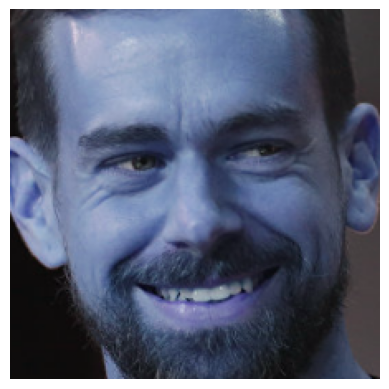

5.246097492926871e-16
--------------------------------


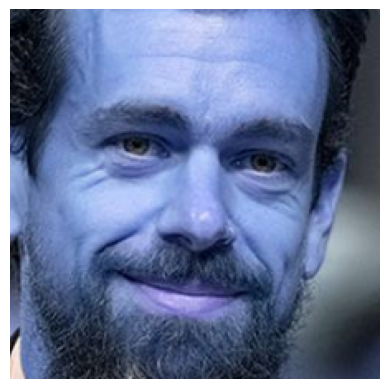

7.586255435829968
--------------------------------


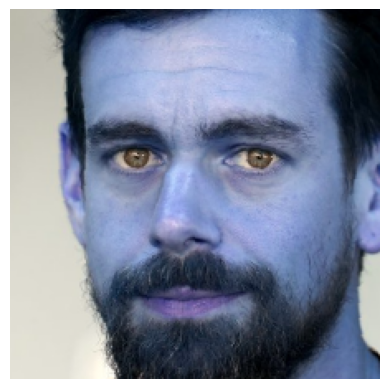

7.976811574660615
--------------------------------


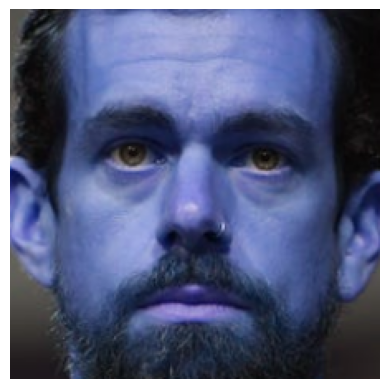

8.072440229692953
--------------------------------


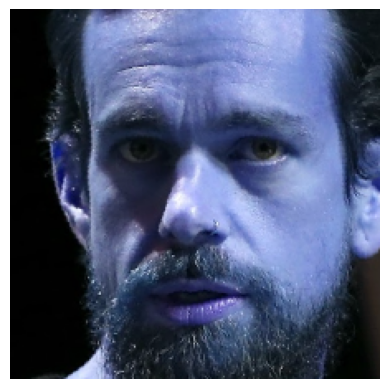

9.387891053078723
--------------------------------


In [75]:
for index, instance in result_df.iterrows():
    img_path = instance["img_name"]
    distance = instance["distance"]
    
    img = DeepFace.extract_faces(img_path)[0]["face"]
    plt.imshow(img[:,:,::-1])
    plt.axis('off')
    plt.show()
    print(distance)
    print("--------------------------------")